# HR Analytics Project- Understanding the Attrition in HR

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

 

In [305]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [306]:
df=pd.read_csv(r'HR Analytics Project- Understanding the Attrition in HR.csv')


In [307]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [308]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [309]:
df.shape # checking the data shape, our data have 1470 rows and 35 columns

(1470, 35)

# EDA

In [310]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [311]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There is no null values in the data set

In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

target column is in object type rest most of the columns in int64

In [313]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


Above data there is  no missing data found, there are lots of difference we can see in data

EmployeeCount=All the data use to fill is same that is 1. so there would be no mean to have them in dataset EmployerNumber=It is just a unique number given to employer that doesnot effect our target data . Over18= It's just a Labour law in india that below 18 you just cant get employed StandardHours=Its also giving only single value for all our columns

In [314]:
df.drop(['EmployeeCount','EmployeeNumber','StandardHours','Over18','OverTime'], axis=1, inplace=True)

In [315]:
df.shape


(1470, 30)

In [316]:
object_datatypes=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='O':
        object_datatypes.append(x)
        
object_datatypes        
    


['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus']

above is the all columns having object type datatype and these are 8numbers

In [317]:
int_datatypes =[]
for x in df.dtypes.index:
    if df.dtypes[x]=='int64':
        int_datatypes.append(x)
        
int_datatypes        

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [318]:
df.nunique().to_frame("Unique values")

,Unique values
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EnvironmentSatisfaction,4
Gender,2


In [319]:
for col in object_datatypes:
    print(col)
    print(df[col].value_counts())
    print("="*80)

Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
Gender
Male      882
Female    588
Name: Gender, dtype: int64
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64
MaritalStatus
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtyp

# Visualization

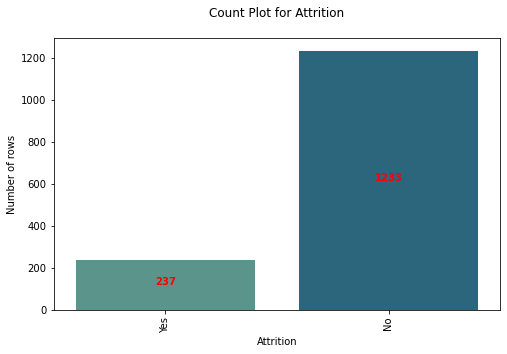

In [320]:
plt.figure(figsize=(8,5))
col_name = 'Attrition'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="crest")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='r')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

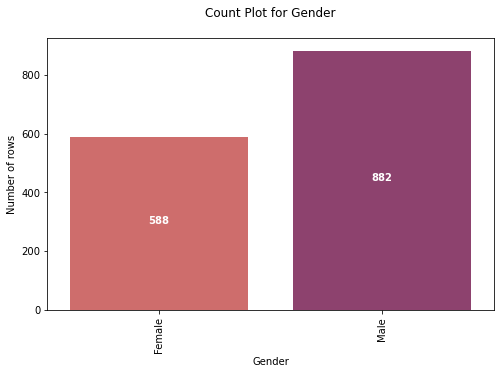

In [321]:
plt.figure(figsize=(8,5))
col_name = 'Gender'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="flare")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

In [322]:
plt.figure(figsize=(8,5))
col_name = 'OverTime'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="flare")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

KeyError: 'OverTime'

<Figure size 576x360 with 0 Axes>

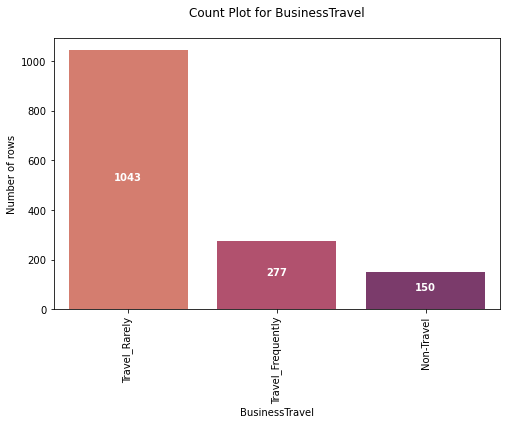

In [323]:
plt.figure(figsize=(8,5))
col_name = 'BusinessTravel'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="flare")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

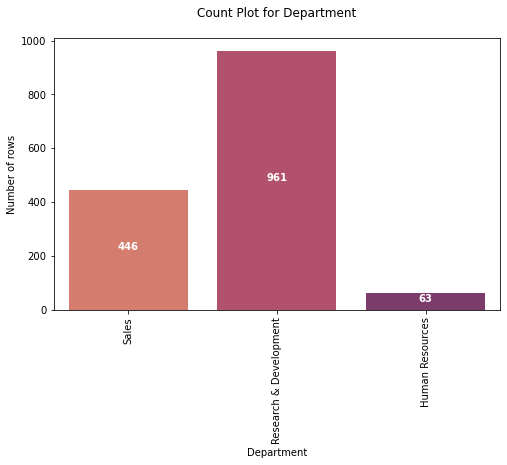

In [324]:
plt.figure(figsize=(8,5))
col_name = 'Department'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="flare")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

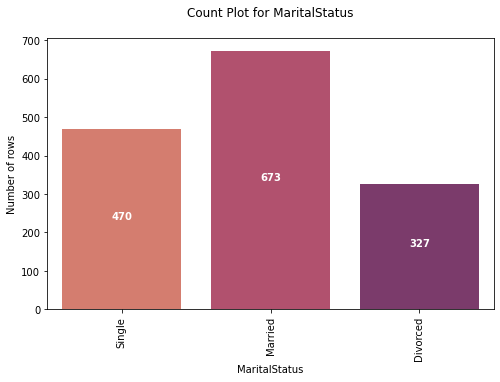

In [325]:
plt.figure(figsize=(8,5))
col_name = 'MaritalStatus'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="flare")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

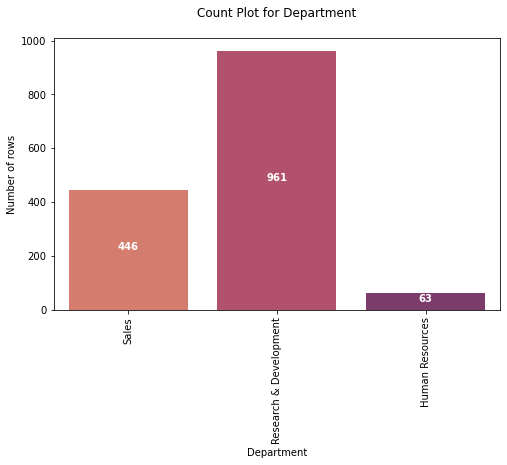

In [326]:
plt.figure(figsize=(8,5))
col_name = 'Department'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="flare")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

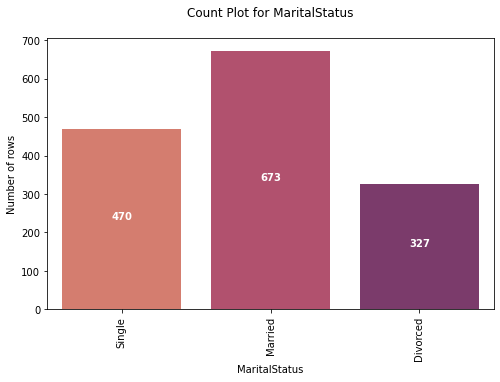

In [327]:
plt.figure(figsize=(8,5))
col_name = 'MaritalStatus'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="flare")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

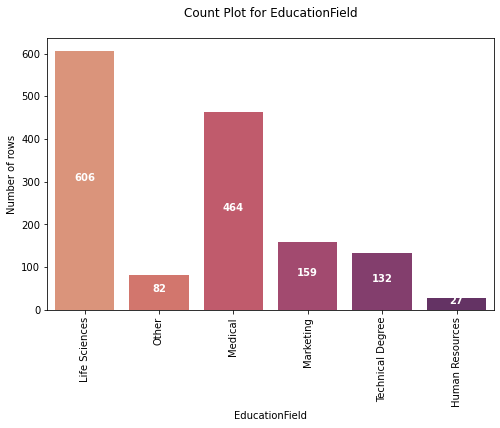

In [328]:
plt.figure(figsize=(8,5))
col_name = 'EducationField'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="flare")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

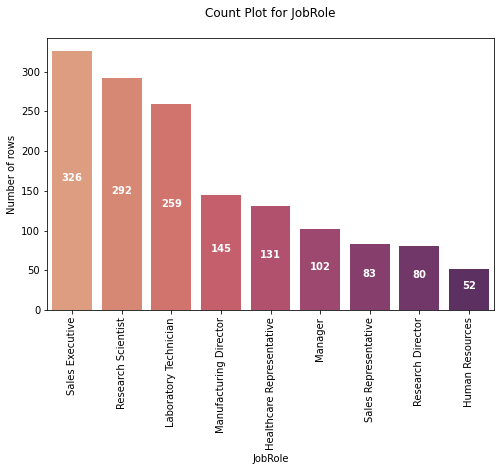

In [329]:
plt.figure(figsize=(8,5))
col_name = 'JobRole'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="flare")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

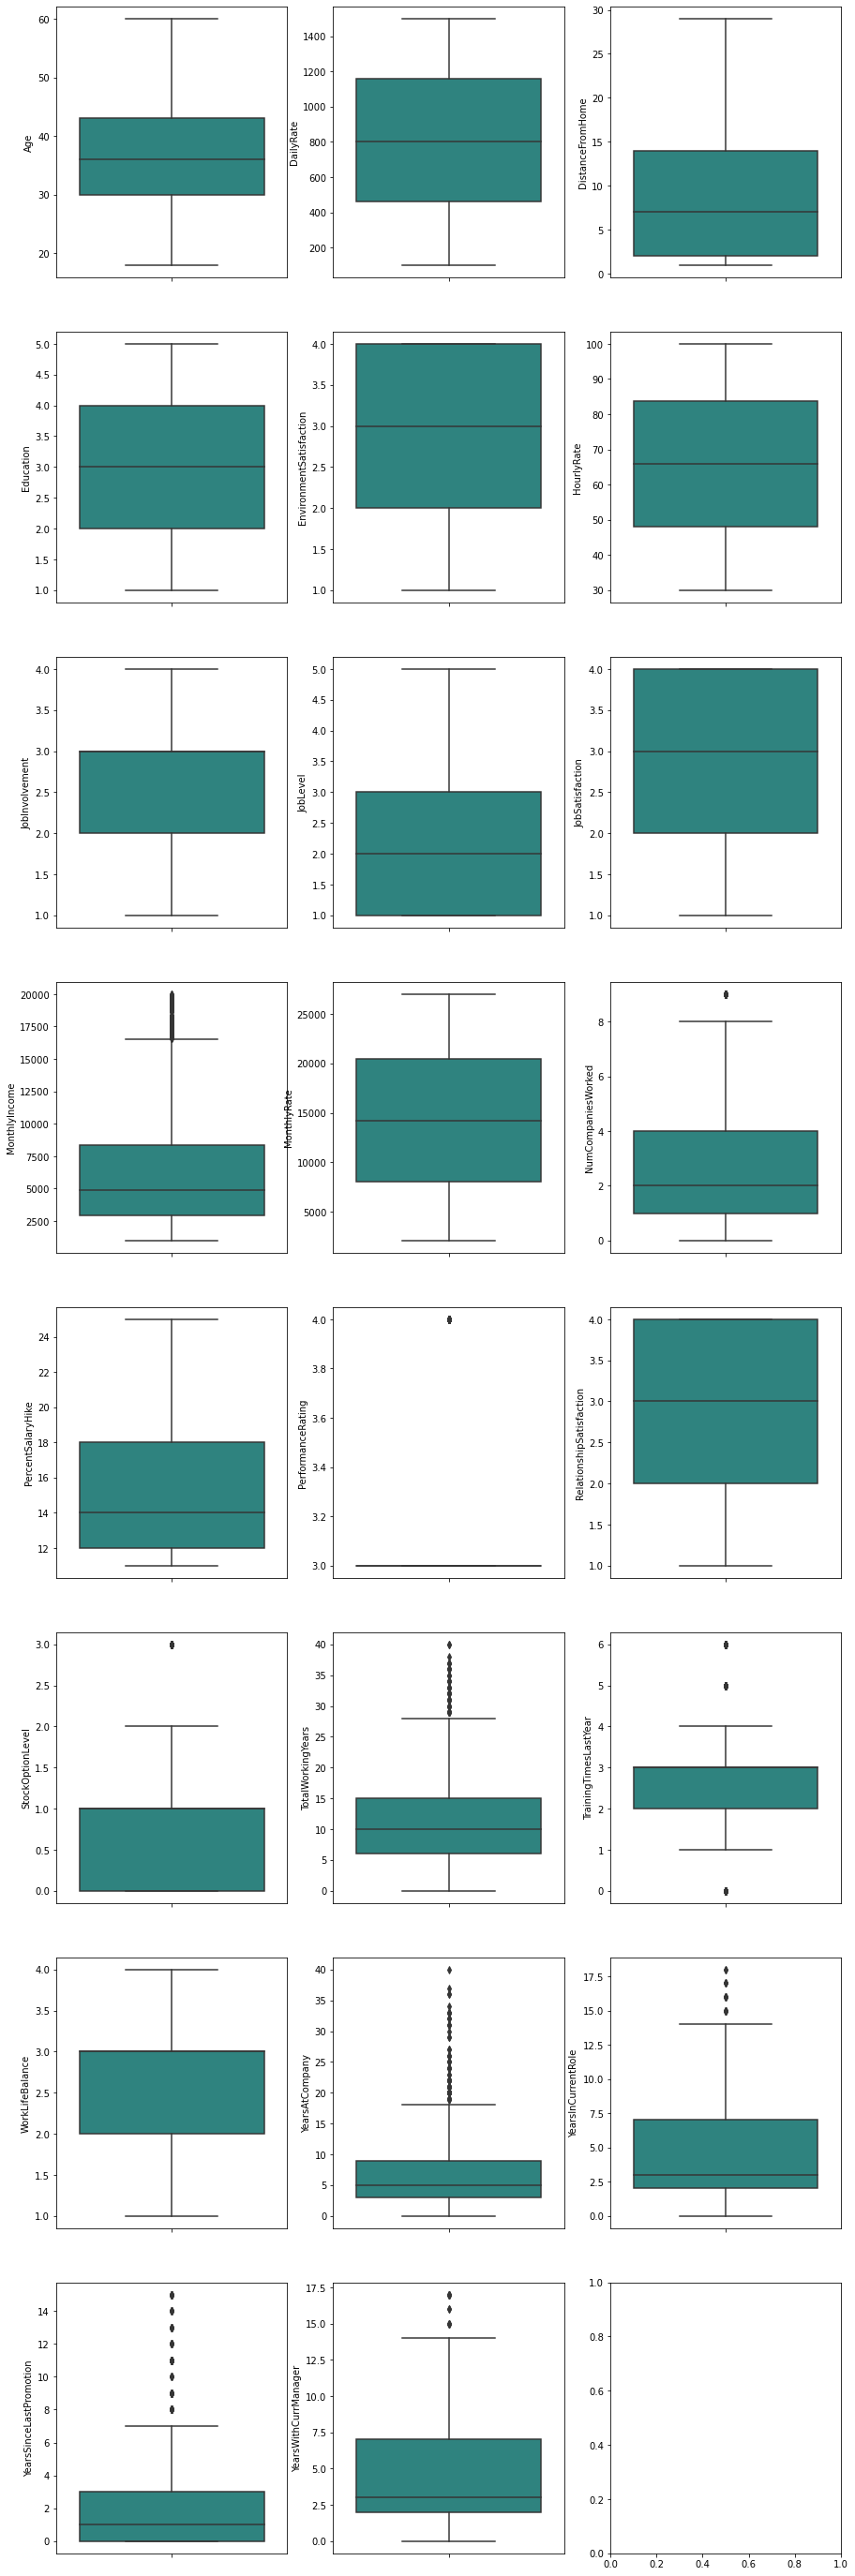

In [330]:
fig, ax= plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index=0
ax=ax.flatten()
for col, value in df[int_datatypes].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette ="viridis")
    index +=1
plt.show()    

from the above boxplot we have many columns having coutliers they need to be treated

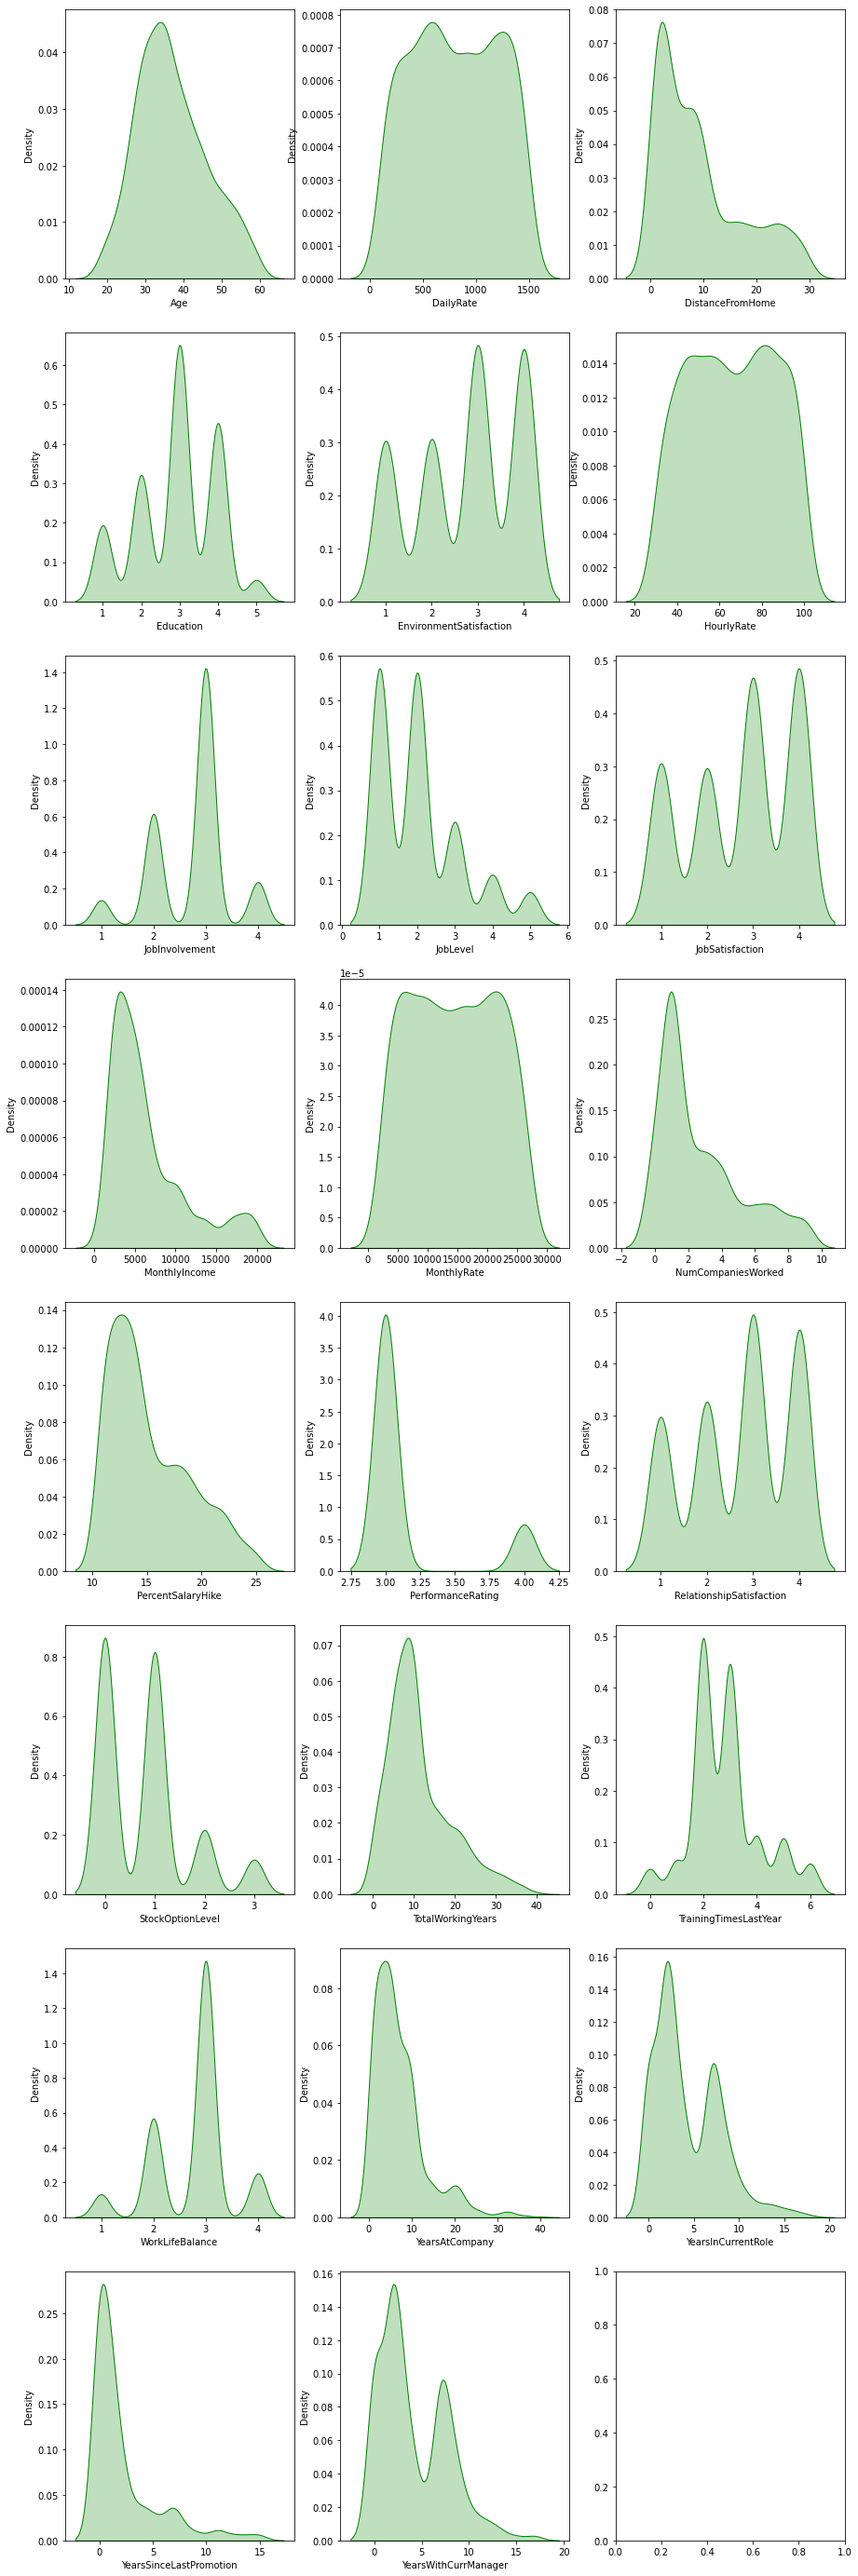

In [331]:
fig, ax= plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index=0
ax=ax.flatten()
for col, value in df[int_datatypes].items():
    sns.distplot(value,ax=ax[index],hist=False, color="g", kde_kws = {'shade':True})
    index +=1
plt.show()    

we can see some skewness in the data, we need to remove before model preparation

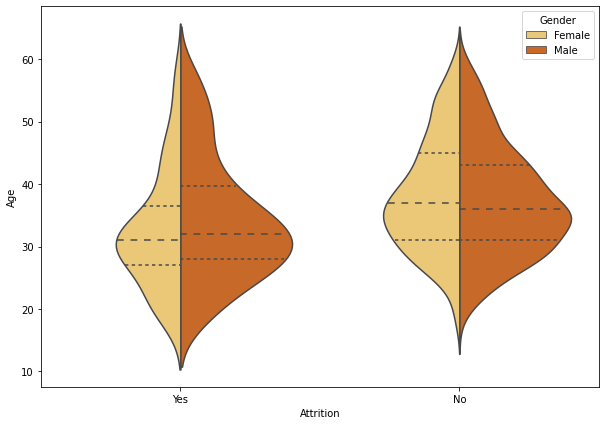

In [332]:
plt.figure(figsize=(10,7))
sns.violinplot(x='Attrition',y='Age',hue='Gender', data=df,
              palette='YlOrBr',split=True, scale='count',inner="quartile")
plt.show()

above map shows that Men attrition is more that female,there is a wide range in age between 20 and 30

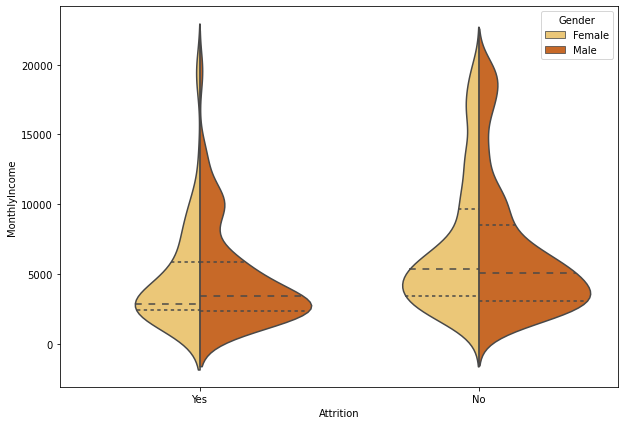

In [333]:
plt.figure(figsize=(10,7))
sns.violinplot(x='Attrition', y='MonthlyIncome',hue='Gender', data=df,
              palette='YlOrBr',split=True, scale='count',inner="quartile")
plt.show()

the above we can see that both men and female are having monthlyincome less than 5000

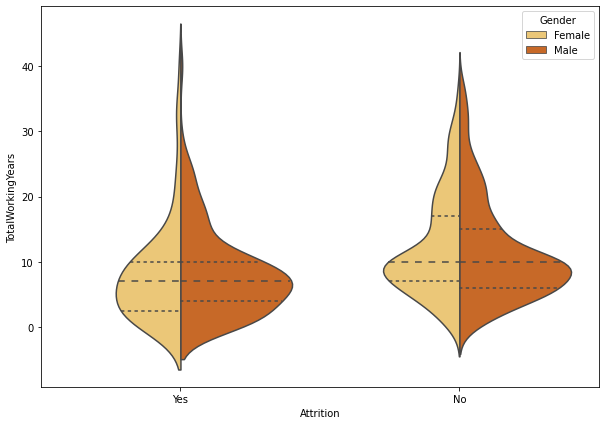

In [334]:
plt.figure(figsize=(10,7))
sns.violinplot(x='Attrition', y='TotalWorkingYears',hue='Gender', data=df,
              palette='YlOrBr',split=True, scale='count',inner="quartile")
plt.show()

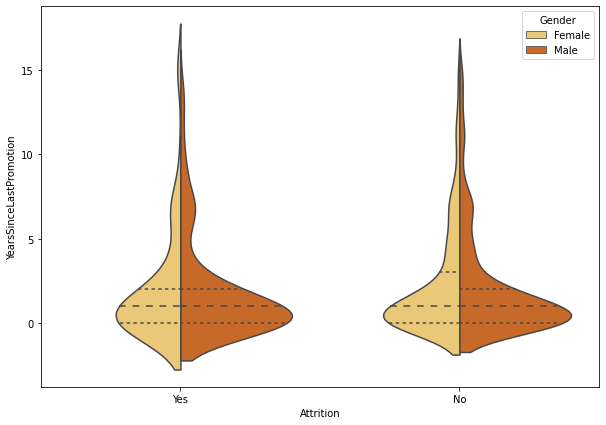

In [335]:
plt.figure(figsize=(10,7))
sns.violinplot(x='Attrition', y='YearsSinceLastPromotion',hue='Gender', data=df,
              palette='YlOrBr',split=True, scale='count',inner="quartile")
plt.show()

Men and female which are got promoted less than 5years

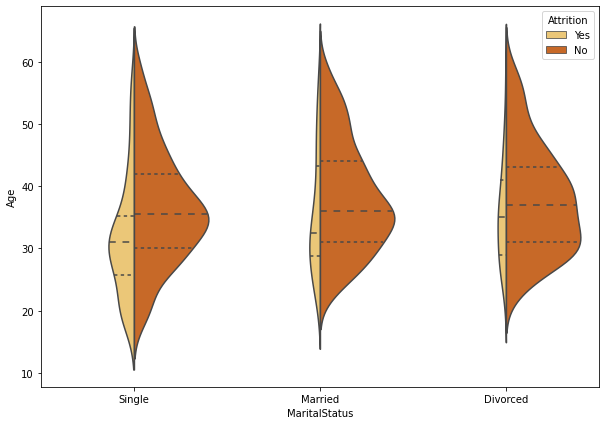

In [336]:
plt.figure(figsize=(10,7))
sns.violinplot(x='MaritalStatus', y='Age',hue='Attrition', data=df,
              palette='YlOrBr',split=True, scale='count',inner="quartile")
plt.show()

age between 35 to 40 some attrition we could see, but married people less in attrition rate

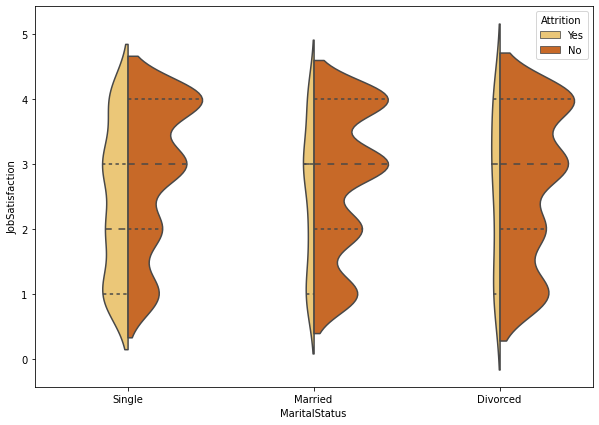

In [337]:
plt.figure(figsize=(10,7))
sns.violinplot(x='MaritalStatus', y='JobSatisfaction',hue='Attrition', data=df,
              palette='YlOrBr',split=True, scale='count',inner="quartile")
plt.show()

In [338]:
here shows that single are more satified with there job than married or Divored

SyntaxError: invalid syntax (Temp/ipykernel_3140/2992787614.py, line 1)

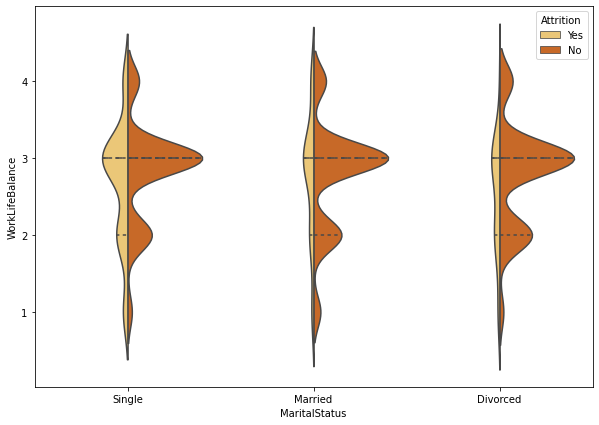

In [339]:
plt.figure(figsize=(10,7))
sns.violinplot(x='MaritalStatus', y='WorkLifeBalance',hue='Attrition', data=df,
              palette='YlOrBr',split=True, scale='count',inner="quartile")
plt.show()

worklife balance single more balnaced life

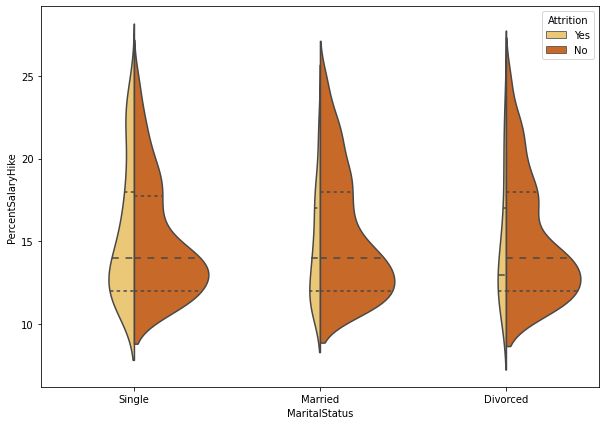

In [340]:
plt.figure(figsize=(10,7))
sns.violinplot(x='MaritalStatus', y='PercentSalaryHike',hue='Attrition', data=df,
              palette='YlOrBr',split=True, scale='count',inner="quartile")
plt.show()

Salary hike also for single are geting more hike, may be because they having less burdon,so can concentrate in work.

# Encoding the categorical object datatype columns

In [341]:
le=LabelEncoder()
df['Attrition']=le.fit_transform(df['Attrition'])

In [342]:
df['Attrition']

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

target data is converted into int64 from object

In [343]:
#ordinal encoder

oe = OrdinalEncoder()

df['BusinessTravel']= oe.fit_transform(df['BusinessTravel'].values.reshape(-1,1))
df['Department']= oe.fit_transform(df['Department'].values.reshape(-1,1))
df['EducationField']= oe.fit_transform(df['EducationField'].values.reshape(-1,1))
df['Gender']= oe.fit_transform(df['Gender'].values.reshape(-1,1))
df['JobRole']= oe.fit_transform(df['JobRole'].values.reshape(-1,1))
df['MaritalStatus']= oe.fit_transform(df['MaritalStatus'].values.reshape(-1,1))


converting object data to int data

In [344]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,2.0,1,2,1.0,2,0.0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1.0,279,1.0,8,1,1.0,3,1.0,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2.0,1373,1.0,2,2,4.0,4,1.0,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,1.0,3,4,1.0,4,0.0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2.0,591,1.0,2,1,3.0,1,1.0,...,3,4,1,6,3,3,2,2,2,2


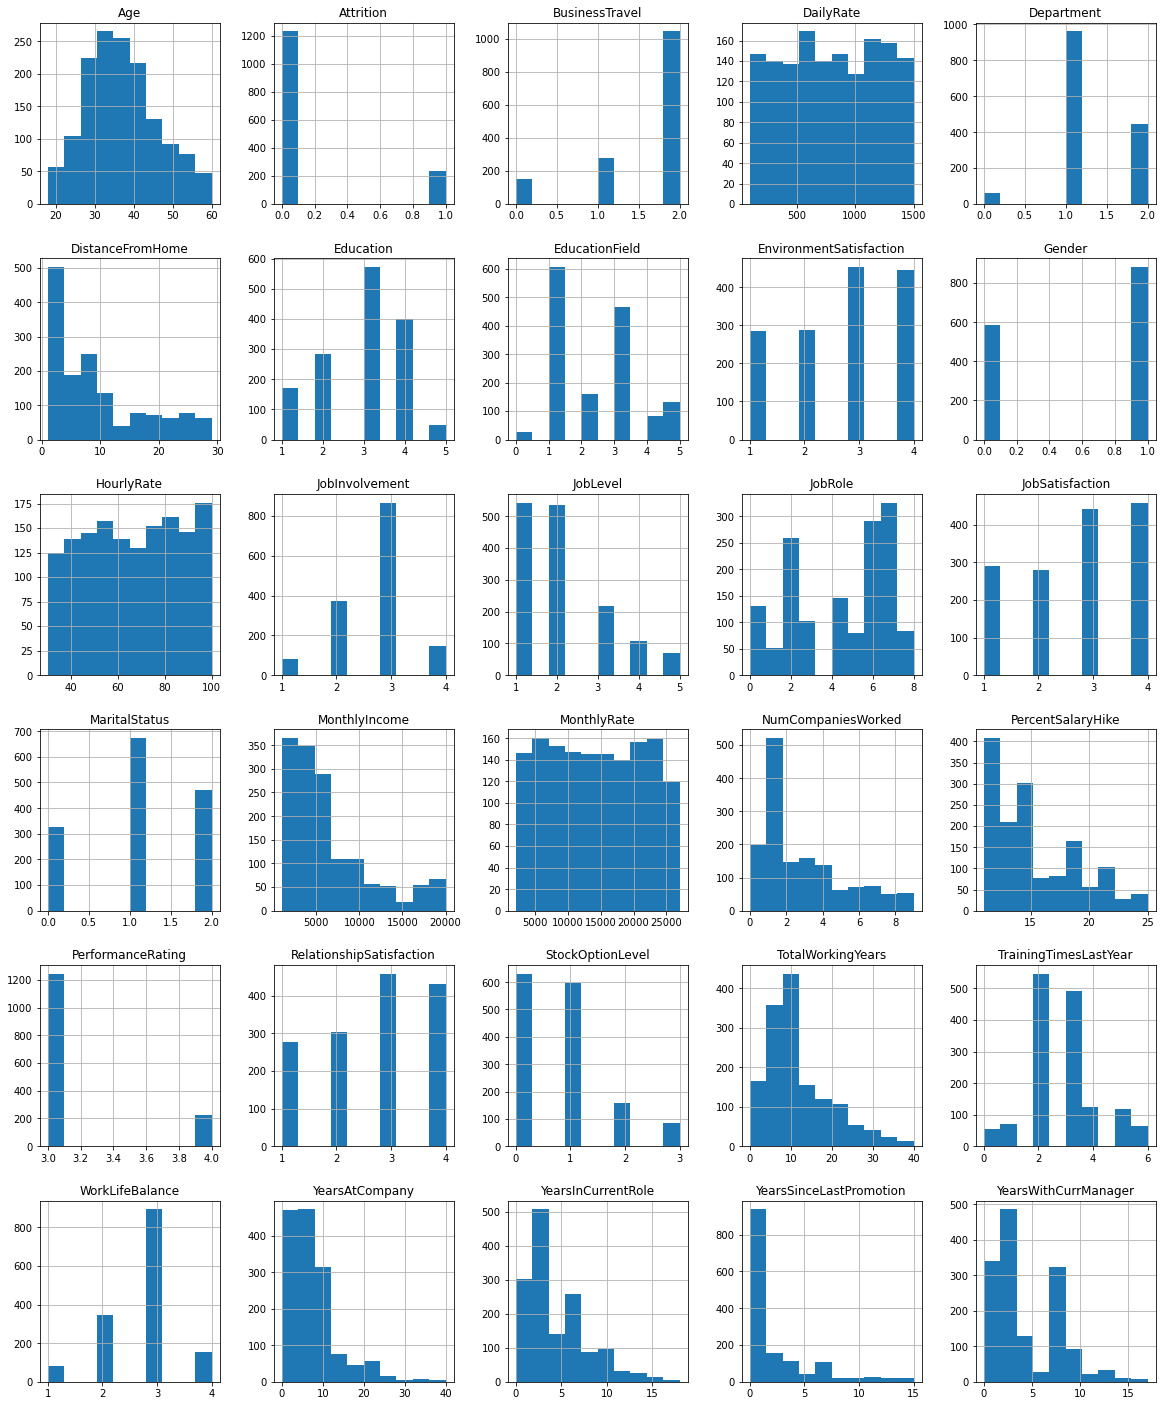

In [345]:
df.hist(figsize = (20,25))
plt.show()

<AxesSubplot:>

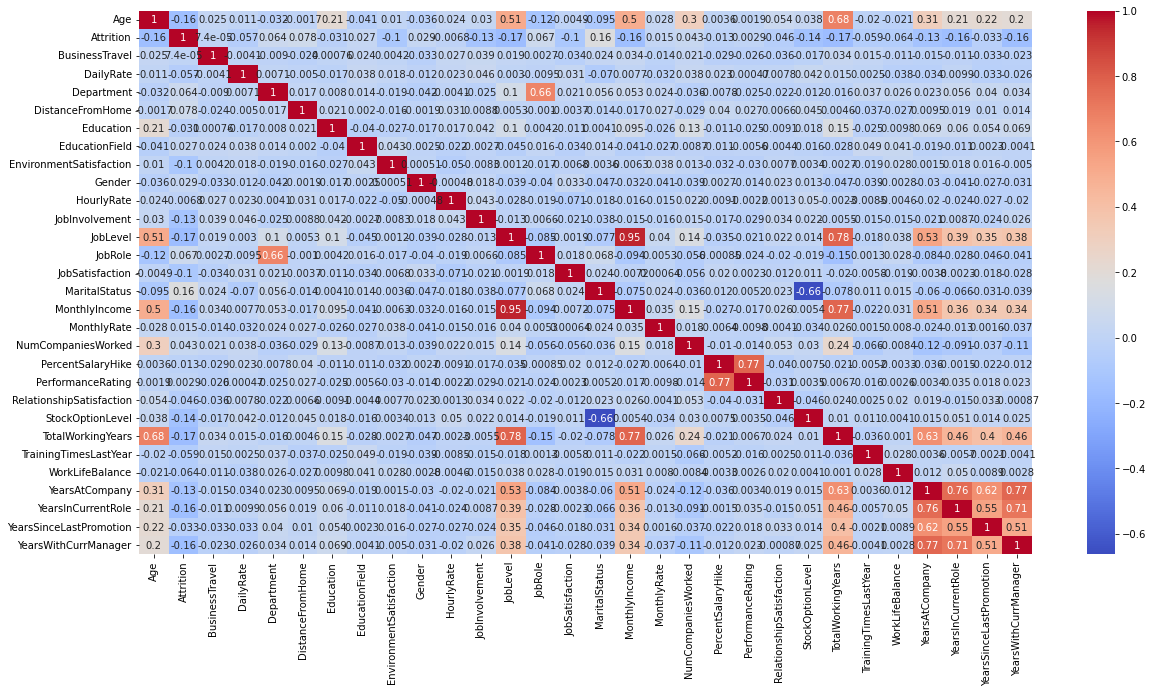

In [346]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

the data set is too big so not very clear, but target column having negative and positive co-relation

# correlation bar plot

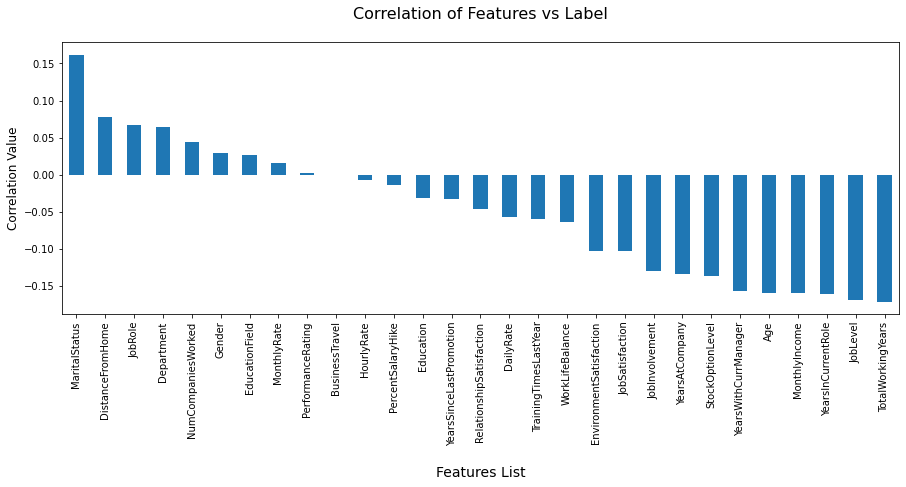

In [347]:
df_corr = df.corr()
plt.figure(figsize=(15,5))
df_corr['Attrition'].sort_values(ascending=False).drop('Attrition').plot.bar()
plt.title("Correlation of Features vs Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

# Using Z Score to remove outliers

In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   int32  
 2   BusinessTravel            1470 non-null   float64
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   float64
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   float64
 8   EnvironmentSatisfaction   1470 non-null   int64  
 9   Gender                    1470 non-null   float64
 10  HourlyRate                1470 non-null   int64  
 11  JobInvolvement            1470 non-null   int64  
 12  JobLevel                  1470 non-null   int64  
 13  JobRole                   1470 non-null   float64
 14  JobSatis

In [349]:
for col in int_datatypes:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

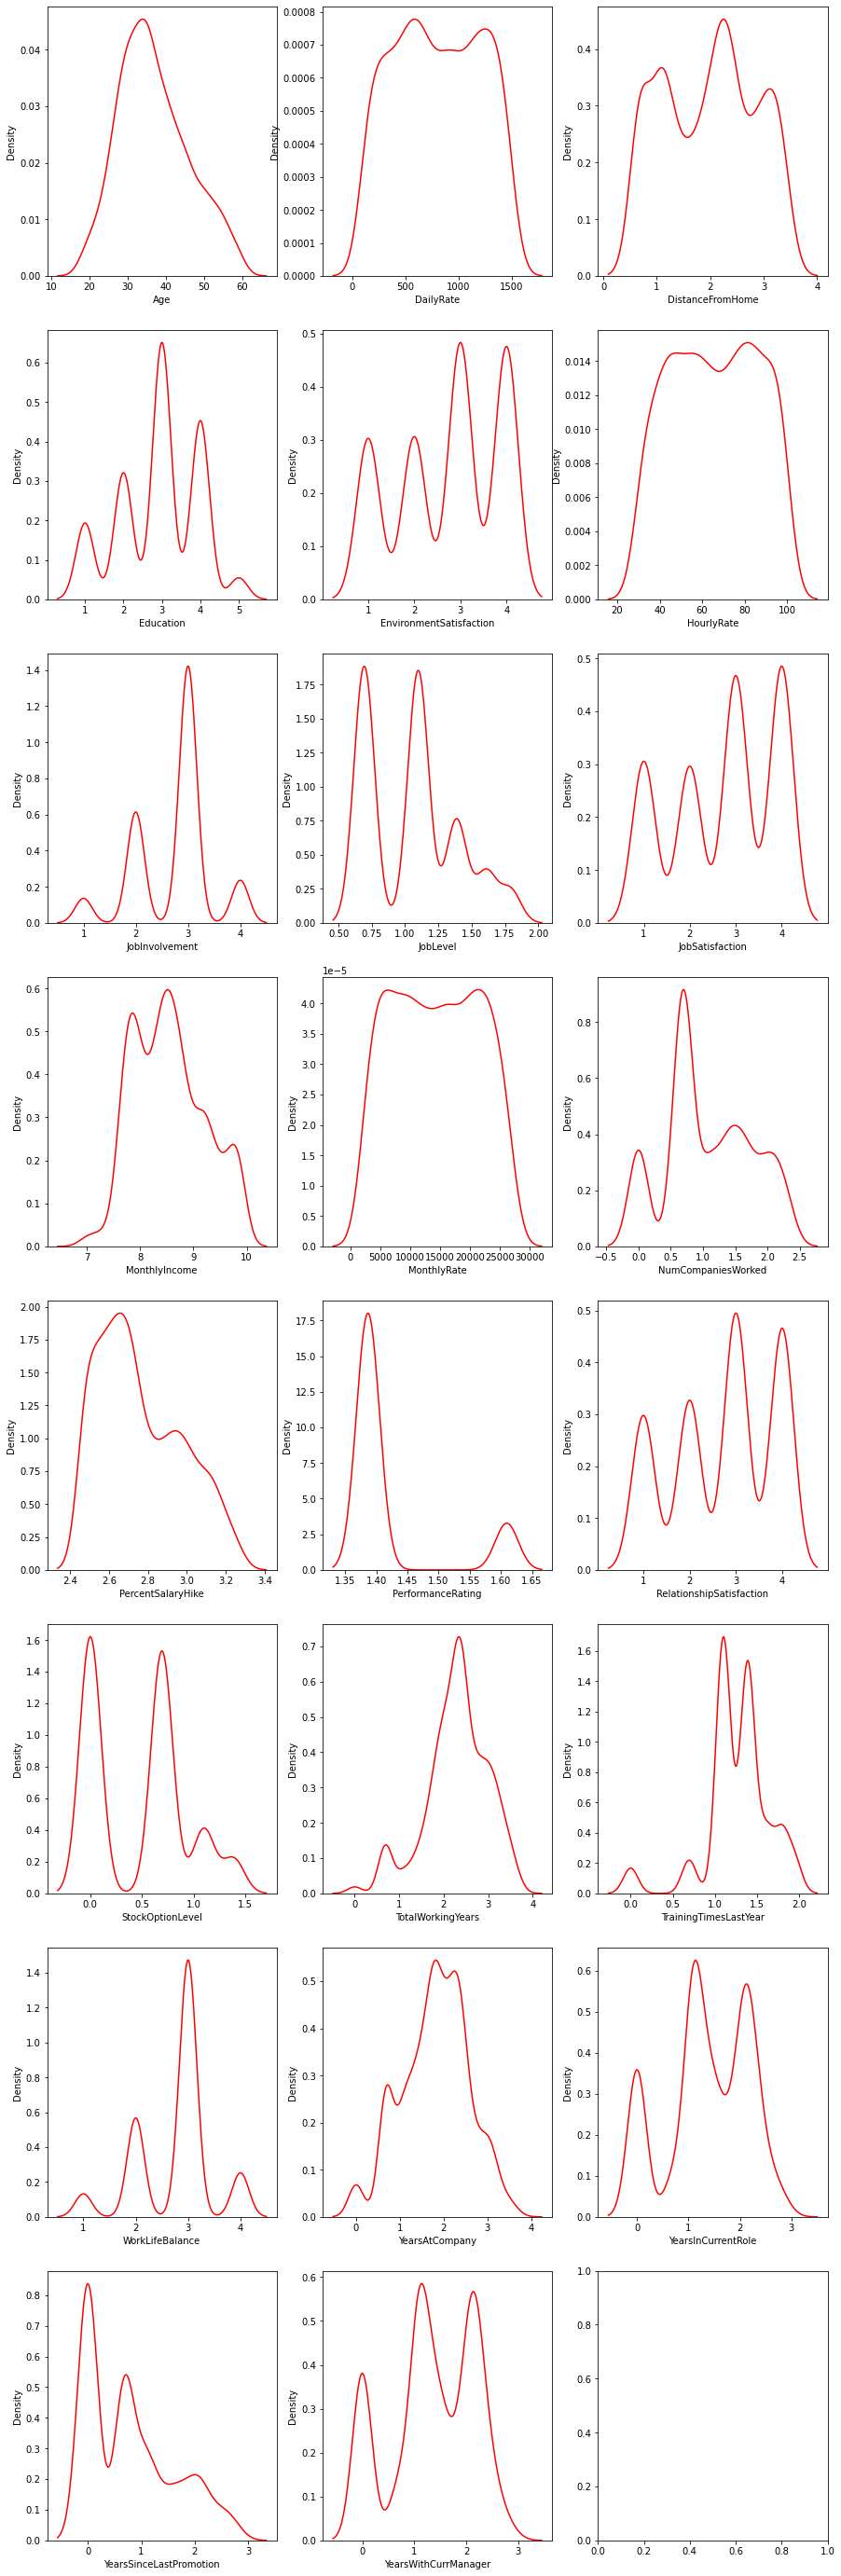

In [350]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[int_datatypes].items():
    sns.distplot(value, ax=ax[index], hist=False, color="r", kde_kws={"shade": False})
    index += 1
plt.show()


In [351]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome           -0.029121
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.448133
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.286448
MonthlyRate                 0.018578
NumCompaniesWorked          0.092896
PercentSalaryHike           0.513543
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.271963
TotalWorkingYears          -0.622175
TrainingTimesLastYear      -1.075852
WorkLifeBalance            -0.552480
YearsAtCompany             -0.207708
Y

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [352]:
X = df.drop('Attrition', axis=1)
Y = df['Attrition']

In [353]:
Y.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [354]:
Y.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [355]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [356]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.641587,0.671403,0.838097,1.422173,-1.693694,-0.753375,-1.018488,-0.448747,-1.346843,1.511146,...,-0.467832,-1.465373,-0.950719,0.094555,-3.374670,-2.180651,0.372375,0.491163,-0.996987,0.763396
1,1.536786,-1.004556,-1.269559,-0.549645,0.183805,-1.773036,-1.018488,0.487472,0.847145,-0.253592,...,2.509882,1.392742,0.661560,0.370795,0.378114,0.549730,0.975562,1.102854,-0.084127,1.129200
2,0.193987,0.671403,1.532112,-0.549645,-1.187563,-0.753375,1.315845,1.423690,0.847145,1.404192,...,-0.467832,-0.512668,-0.950719,-0.067583,0.378114,0.549730,-2.224497,-1.603458,-0.996987,-1.514923
3,-0.253612,-1.004556,1.580770,-0.549645,-0.828457,1.285947,-1.018488,1.423690,-1.346843,-0.520977,...,-0.467832,0.440037,-0.950719,0.094555,0.378114,0.549730,0.707761,1.102854,0.828733,-1.514923
4,-0.925012,0.671403,-0.470545,-0.549645,-1.187563,-1.773036,0.537734,-1.384966,0.847145,-1.376608,...,-0.467832,1.392742,0.661560,-0.251400,0.378114,0.549730,-0.758368,-0.173657,0.449862,-0.117978


In [358]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 84.27876823338735 on Random State 270


# Creating the training and testing data sets

In [360]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=270)


In [ ]:
Machine Learning Model for Classification with Evaluation Metrics

In [362]:
#Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=526)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [363]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)

Accuracy Score: 79.57860615883307

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.80       316
           1       0.78      0.81      0.80       301

    accuracy                           0.80       617
   macro avg       0.80      0.80      0.80       617
weighted avg       0.80      0.80      0.80       617

Cross Validation Score: 79.6874461078582

Accuracy Score - Cross Validation Score is -0.10883994902512484


In [365]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)

Accuracy Score: 85.08914100486223

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85       316
           1       0.82      0.88      0.85       301

    accuracy                           0.85       617
   macro avg       0.85      0.85      0.85       617
weighted avg       0.85      0.85      0.85       617

Cross Validation Score: 82.69267723842295

Accuracy Score - Cross Validation Score is 2.3964637664392825


In [366]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)

Accuracy Score: 92.38249594813614

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.93       316
           1       0.95      0.89      0.92       301

    accuracy                           0.92       617
   macro avg       0.93      0.92      0.92       617
weighted avg       0.93      0.92      0.92       617

Cross Validation Score: 90.2384804263741

Accuracy Score - Cross Validation Score is 2.144015521762043


In [367]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)

Accuracy Score: 75.85089141004863

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.55      0.70       316
           1       0.67      0.98      0.80       301

    accuracy                           0.76       617
   macro avg       0.82      0.76      0.75       617
weighted avg       0.82      0.76      0.75       617

Cross Validation Score: 76.40045659475574

Accuracy Score - Cross Validation Score is -0.5495651847071059


In [369]:
Final_Model= ExtraTreesClassifier(criterion='gini',max_features='log2',min_samples_split=3,n_estimators=100)
classifier=Final_Model.fit(X_train,Y_train)
fmod_pred=Final_Model.predict(X_test)
fmod_accuracy=(accuracy_score(Y_test,fmod_pred))*100
accuracy_score=print('accuracy_score=',fmod_accuracy)

accuracy_score= 95.9481361426256


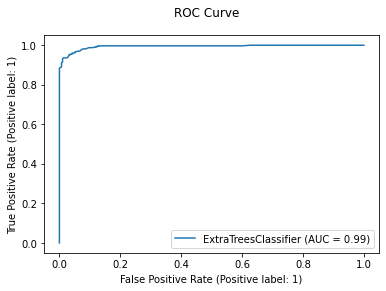

In [370]:
disp = metrics.plot_roc_curve(Final_Model, X_test, Y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

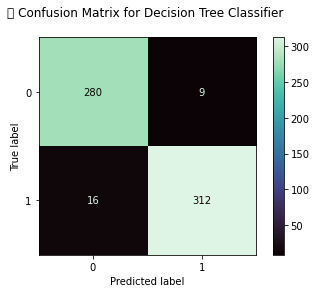

In [371]:
class_names = df.columns
metrics.plot_confusion_matrix(classifier, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for Decision Tree Classifier \n')
plt.show()

In [372]:
filname='Final_Model03'

In [373]:
filename = "FinalModel_03"
joblib.dump(Final_Model, filename)

['FinalModel_03']